In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('/content/INvideos.csv')
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['publish_time'] = pd.to_datetime(df['publish_time'])

<Axes: title={'center': 'Top Trending Categories (India)'}, xlabel='category_id'>

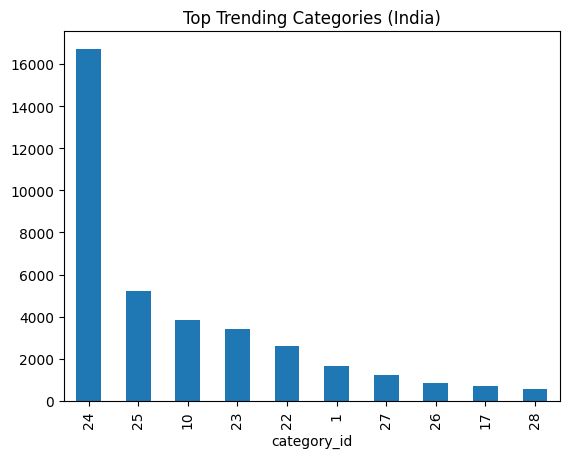

In [11]:
top_cats = df['category_id'].value_counts().head(10)
top_cats.plot(kind='bar', title='Top Trending Categories (India)')

<Axes: title={'center': 'Top Channels by Avg Views'}, ylabel='channel_title'>

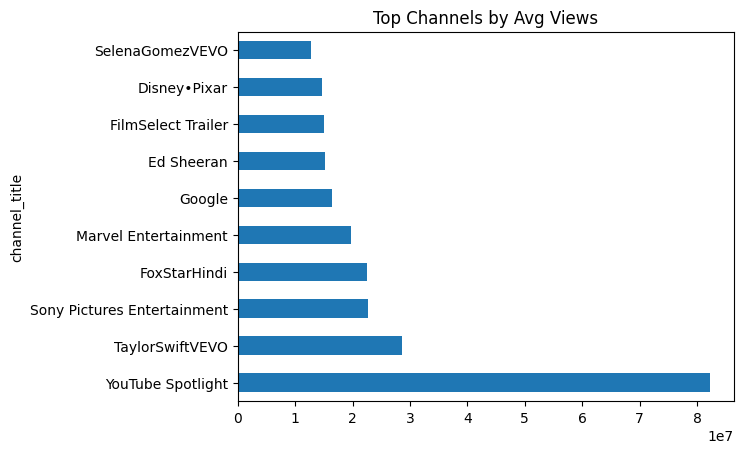

In [12]:
engagement = df.groupby('channel_title')['views'].mean().sort_values(ascending=False).head(10)
engagement.plot(kind='barh', title='Top Channels by Avg Views')

In [15]:
df['publish_time'] = pd.to_datetime(df['publish_time']).dt.tz_localize(None)
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['days_to_trend'] = (df['trending_date'] - df['publish_time']).dt.days

In [16]:
from wordcloud import WordCloud
text = ' '.join(df['tags'].dropna().astype(str))
WordCloud().generate(text)
